
https://ipyleaflet.readthedocs.io/

```bash
conda install -c conda-forge ipyleaflet
```
```bash
jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
```

In [ ]:
from ipyleaflet import Map, Marker

center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)
marker.location = (50, 356)

In [ ]:
stream_path = '../handson/data/watershed/stream.shp'

In [1]:
dem_path  = 'data/dem.tif'

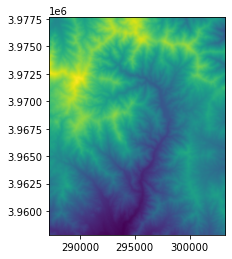

In [2]:
import rasterio
import rasterio.plot
with rasterio.open(dem_path) as src:
    dem_array = src.read().astype('float32')
    dem_profile = src.profile
    rasterio.plot.show(src)

In [3]:
out_profile = dem_profile.copy()
out_profile.update({'dtype': 'float32'})
with rasterio.open('data/dem_float32.tif', 'w+', **out_profile) as dst:
    dst.write(dem_array.astype('float32'))

In [4]:
import xarray as xr
from ipyfastscape import TopoViz3d

In [ ]:
with xr.open_rasterio('data/dem_float32.tif') as ds:
    print((ds.to_dataset(name='topography__elevation')))
    vi = TopoViz3d(ds.to_dataset(name='topography__elevation'))
    vi.show()

In [ ]:
ds = xr.open_rasterio(dem_path)
print((ds.to_dataset(name='topography__elevation')))
vi = TopoViz3d(ds.to_dataset(name='topography__elevation'))
vi.show()


In [ ]:
ds.close()